# TUBES DATA MINING

## Anggota Kelompok
1. Humam Razzan Herditama   | 1202220177
2. Kresna Mukti Wibowo      | 1202223242
3. Mochammad Aziiz Nugroho  | 1202223258
4. Syarif Imam Muslim       | 1202220108

## Data
1. age (usia)
2. sex (jenis kelamin)
3. chest pain type (4 values) (jenis nyeri dada (4 nilai))
4. resting blood pressure (tekanan darah saat istirahat)
5. serum cholestoral in mg/dl (kolesterol serum dalam mg/dl)
6. fasting blood sugar > 120 mg/dl (gula darah puasa > 120 mg/dl)
7. resting electrocardiographic results (values 0,1,2) (hasil elektrokardiografi saat istirahat (nilai 0,1,2))
8. maximum heart rate achieved (detak jantung maksimum yang dicapai)
9. exercise induced angina (angina yang diinduksi oleh olahraga)
10. oldpeak = ST depression induced by exercise relative to rest (oldpeak = depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat)
11. the slope of the peak exercise ST segment (kemiringan segmen ST puncak latihan)
12. number of major vessels (0-3) colored by flourosopy (jumlah pembuluh darah utama (0-3) yang diwarnai oleh fluoroskopi)
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect (thal: 0 = normal; 1 = cacat tetap; 2 = cacat yang dapat diperbaiki)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. (Nama dan nomor jaminan sosial pasien baru-baru ini dihapus dari database, diganti dengan nilai dummy.)

## Data Preparation

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.drop(columns=['target'], inplace=True)

In [6]:
df.duplicated().sum()

np.int64(723)

In [7]:
total_duplicates = df.duplicated().sum()
print(f"Total jumlah yang terduplikasi: {total_duplicates}")

Total jumlah yang terduplikasi: 723


In [8]:
df.drop_duplicates(inplace=True)
print(f"Total jumlah yang terduplikasi setelah dihapus: {df.duplicated().sum()}")

Total jumlah yang terduplikasi setelah dihapus: 0


In [9]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


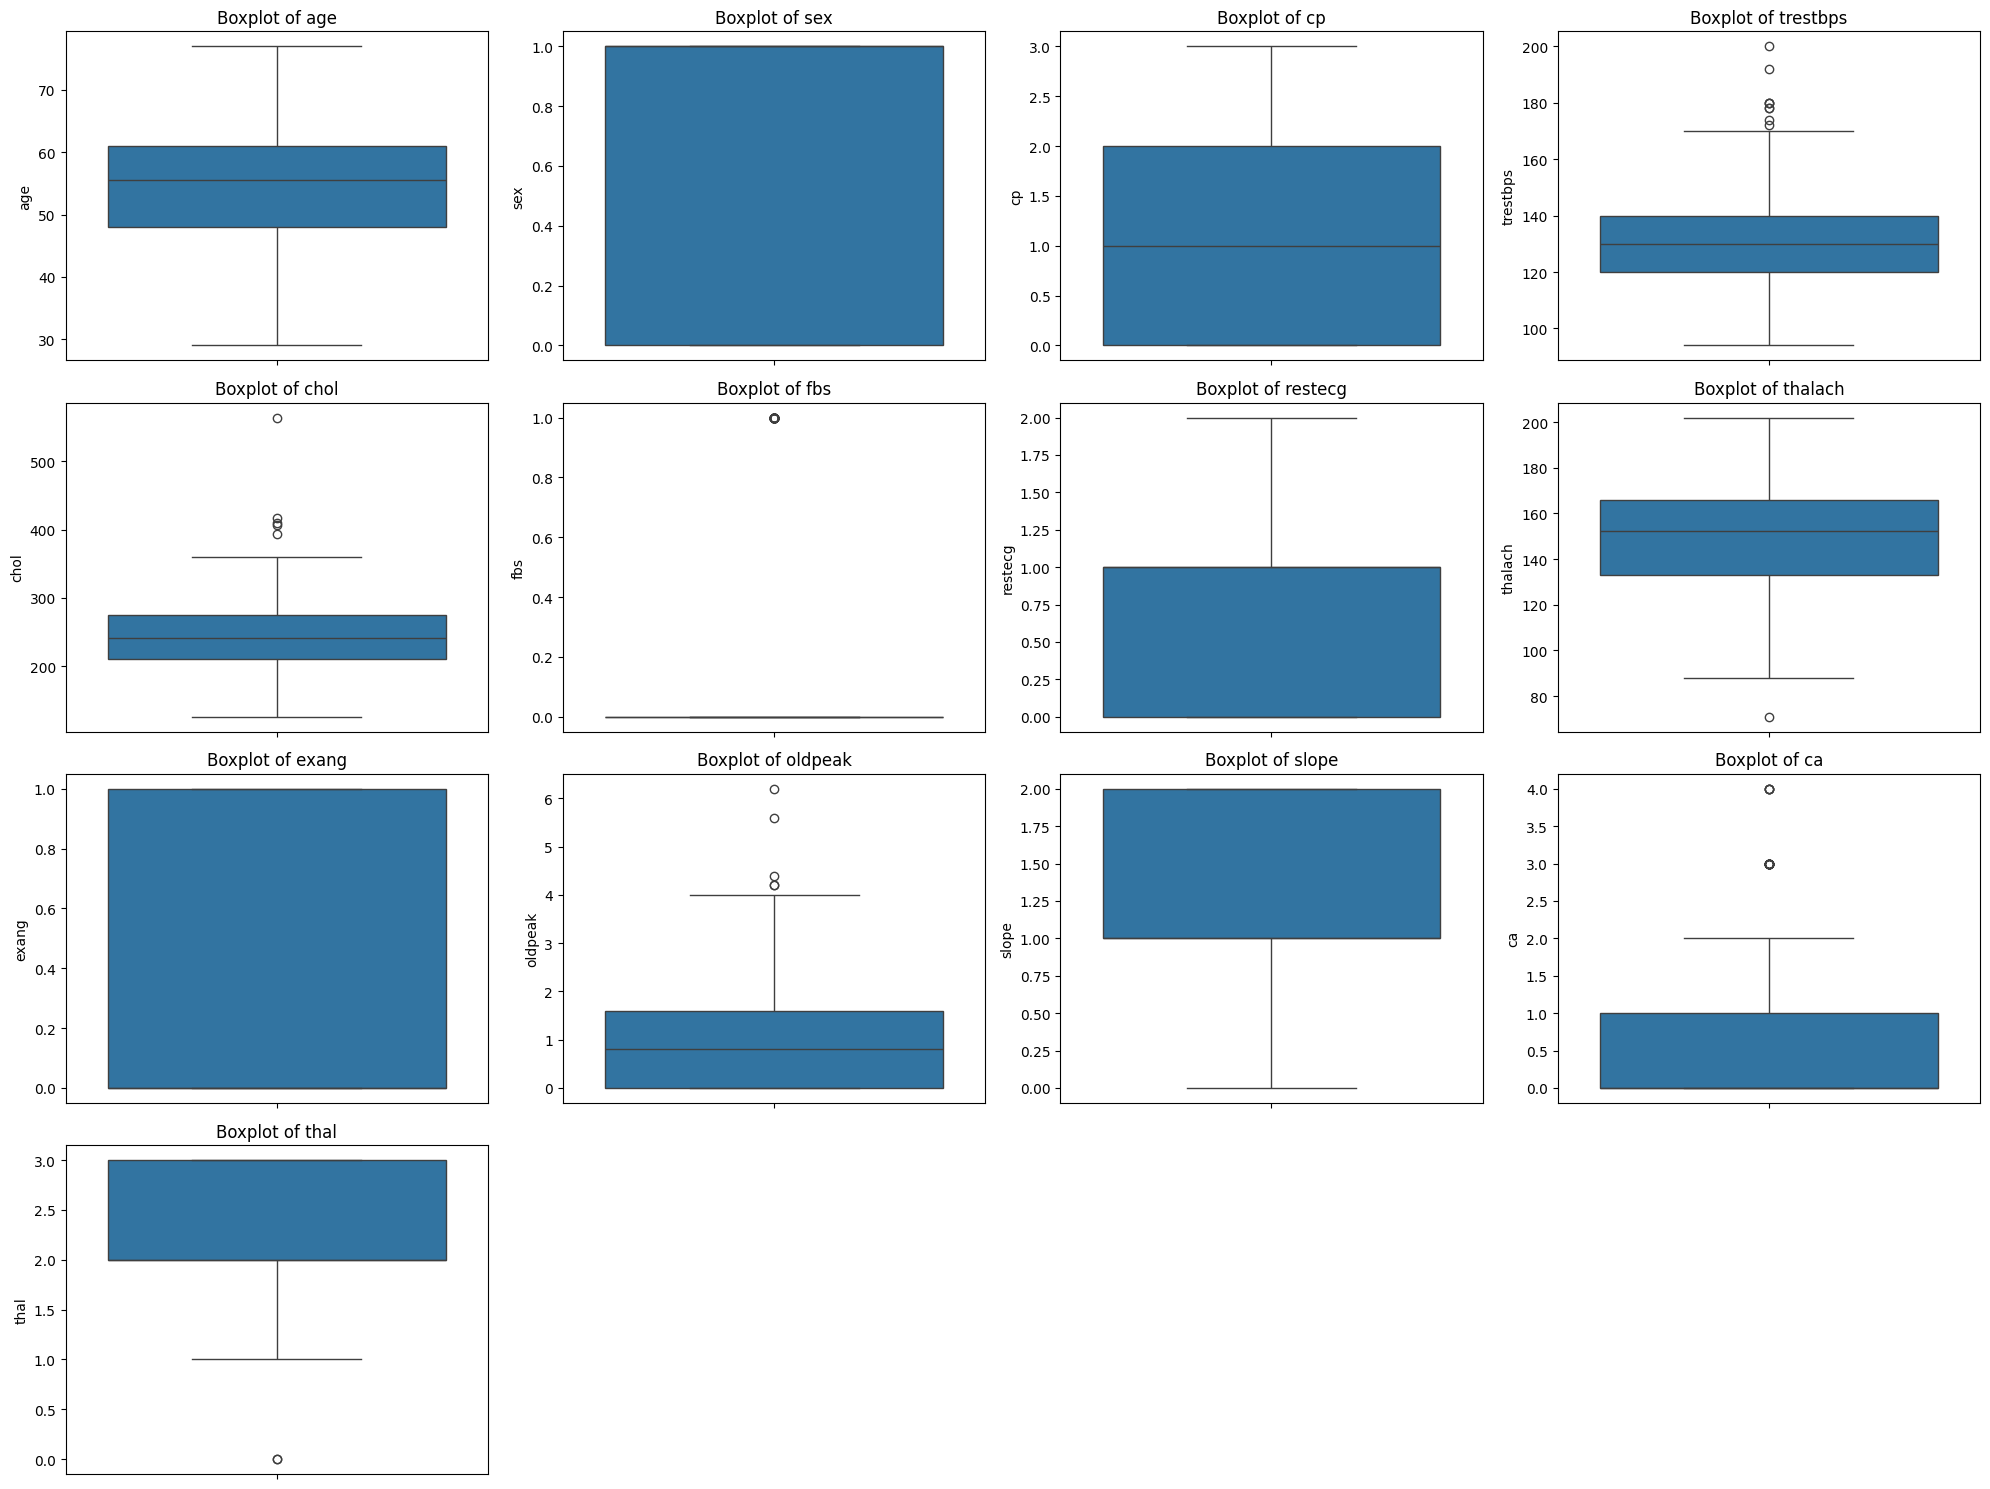

In [10]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define a mask to filter out outliers
mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the dataframe
df = df[mask]

print(f"Dataframe shape after removing outliers: {df.shape}")

Dataframe shape after removing outliers: (228, 13)


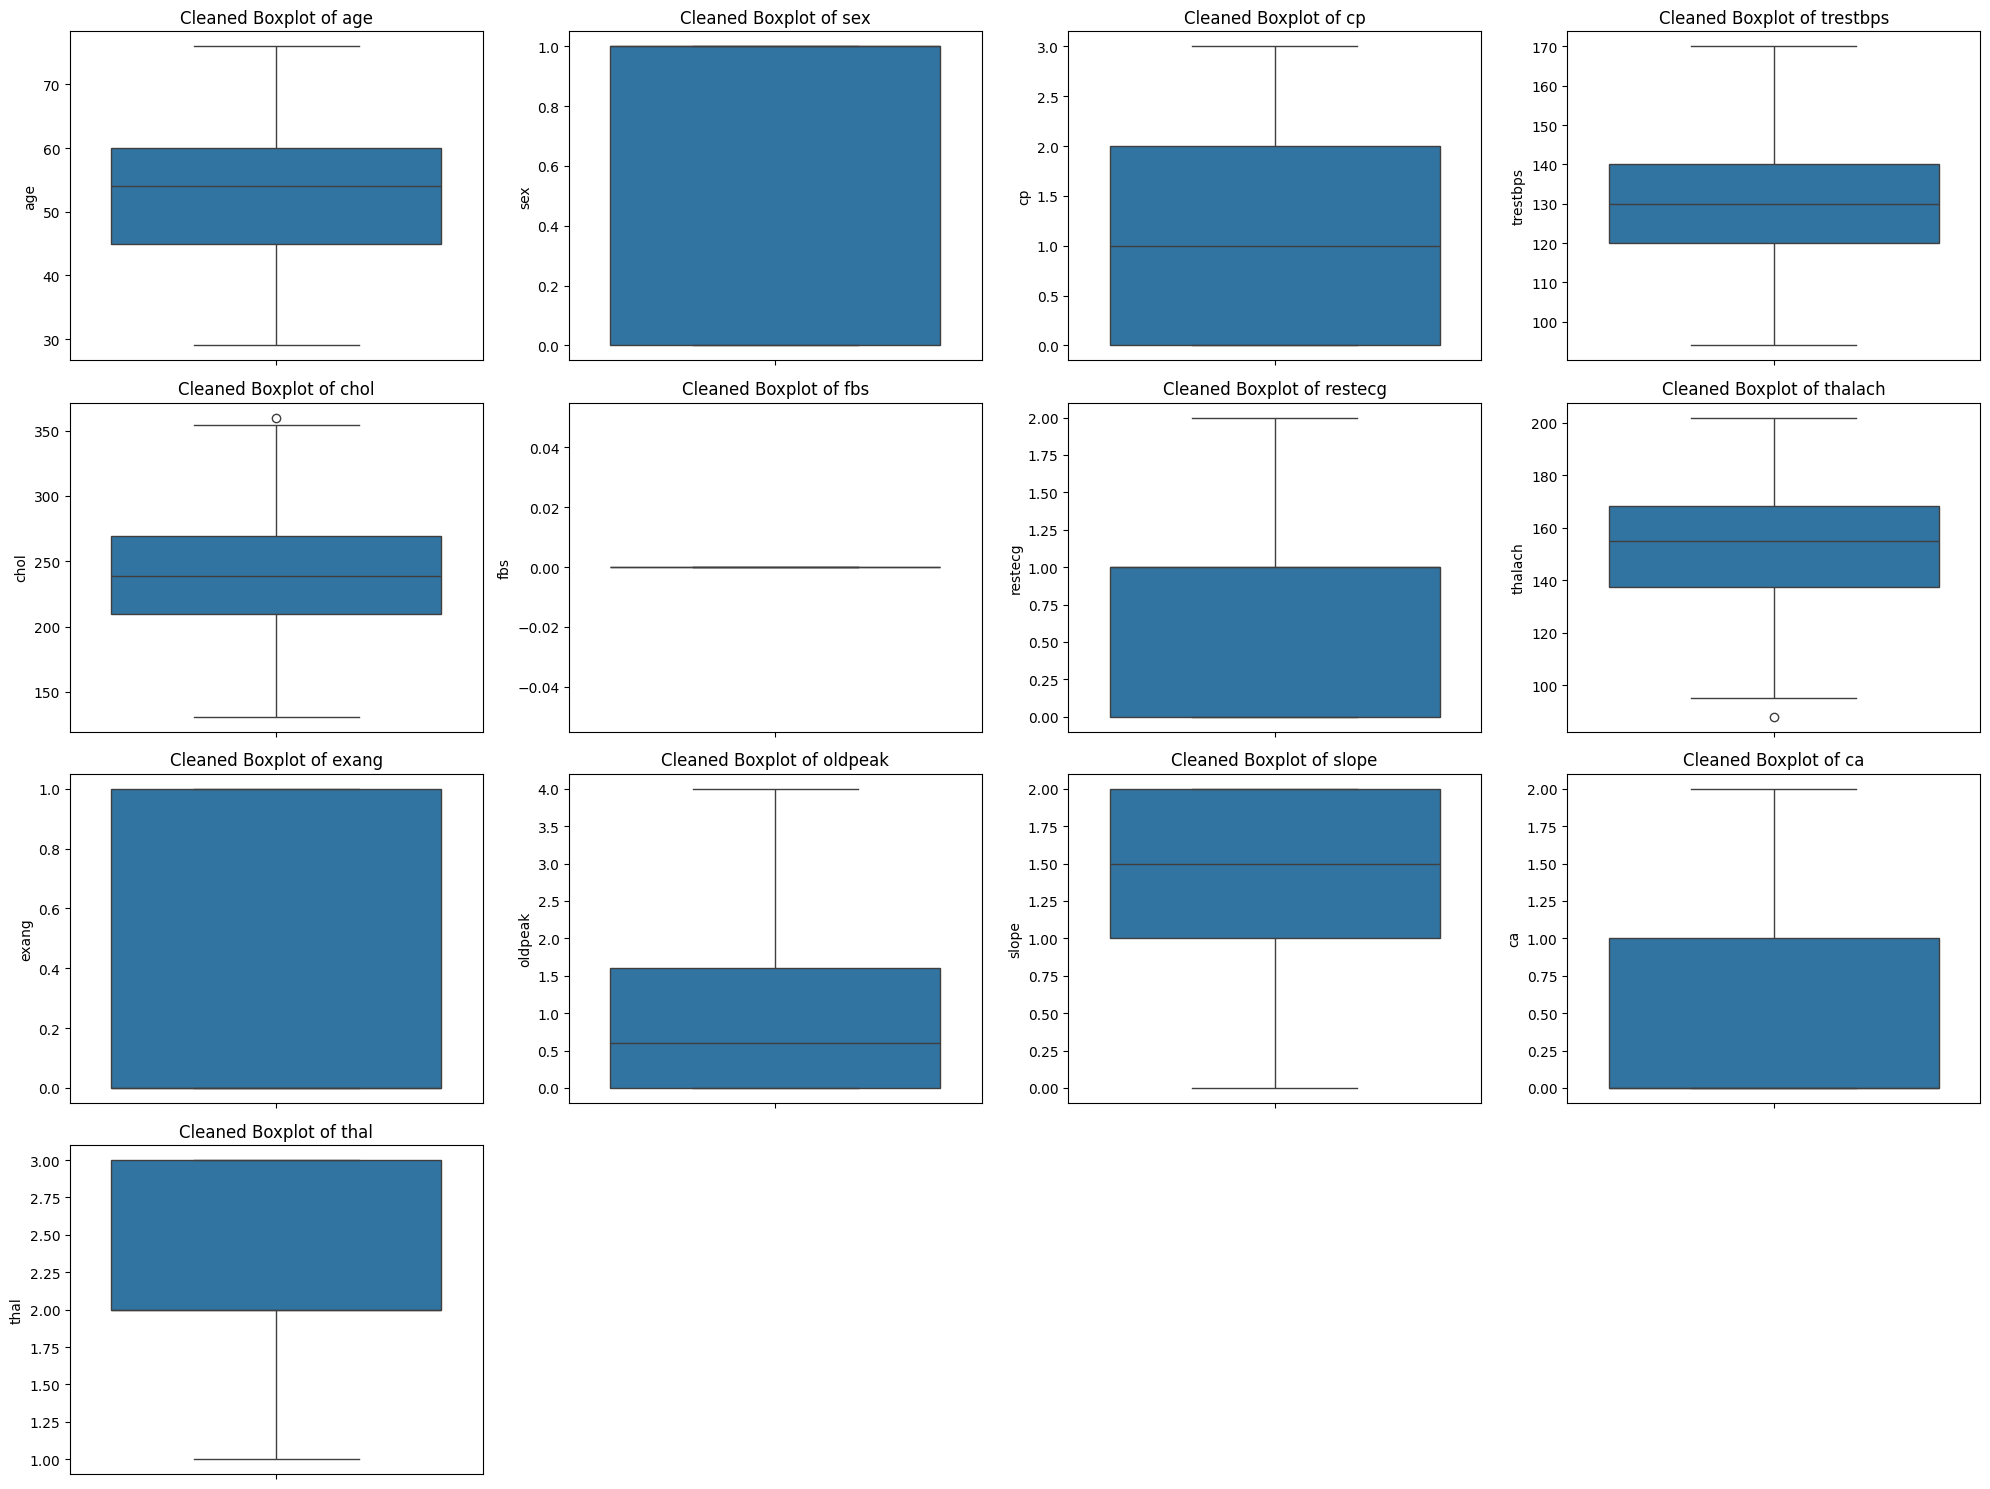

In [12]:
# Cleaned DataFrame
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(f'Cleaned Boxplot of {column}')

plt.tight_layout()
plt.show()

## Unsupervised Learning
(k-means)

### Business Understanding:
Segmentasi Pasien Berdasarkan Risiko Penyakit Jantung
Tujuan: Membantu tenaga medis atau pihak rumah sakit untuk mengelompokkan pasien ke dalam kelompok risiko tertentu.
Tujuan utama dari analisis ini adalah membantu tenaga medis atau pihak rumah sakit dalam mengelompokkan pasien ke dalam kelompok berdasarkan tingkat risiko penyakit jantung yang mereka miliki. Dengan segmentasi ini, tenaga medis dapat lebih mudah memahami kondisi pasien, sehingga memungkinkan pengambilan keputusan yang lebih tepat dan efisien. Pasien dapat dikelompokkan ke dalam beberapa kategori risiko, seperti risiko rendah, sedang, atau tinggi, berdasarkan data kesehatan mereka. Hasil segmentasi ini dapat digunakan untuk menentukan prioritas dalam memberikan perawatan, mengalokasikan sumber daya medis dengan lebih efektif, serta menyusun strategi pengelolaan dan pencegahan penyakit jantung yang lebih terarah. Pada akhirnya, pendekatan ini bertujuan untuk meningkatkan kualitas layanan kesehatan dan mengurangi angka kejadian penyakit jantung melalui tindakan yang lebih terfokus.

In [13]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

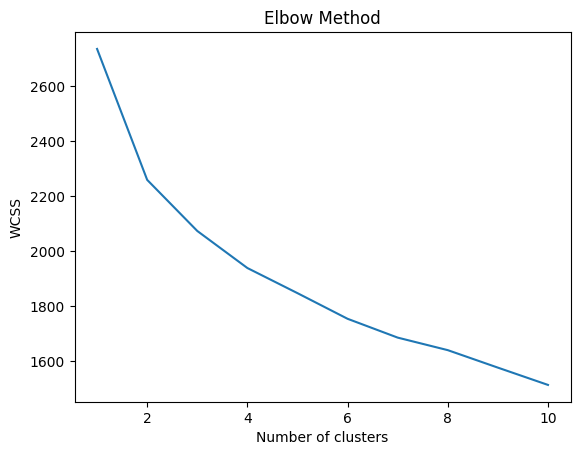

In [14]:
wcss = []  # Menyimpan WCSS untuk setiap K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_df)

df['Cluster'] = y_kmeans

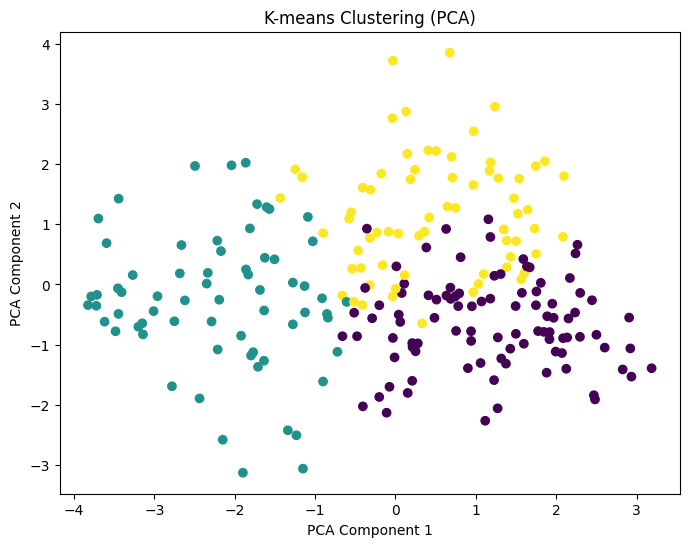

In [16]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [17]:
df.groupby('Cluster').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Cluster,,,,,,,,,,,,,
0,46.894737,0.852632,1.136842,124.915789,230.884211,0.0,0.705263,166.010526,0.136842,0.484211,1.715789,0.210526,2.284211
1,57.242424,0.878788,0.303030,129.424242,245.454545,0.0,0.409091,129.378788,0.787879,1.916667,1.045455,0.984848,2.606061
2,58.611940,0.223881,1.298507,133.253731,255.626866,0.0,0.462687,151.253731,0.104478,0.644776,1.477612,0.358209,2.074627


## Kesimpulan

Melakukan analisis clustering pada dataset penyakit jantung menggunakan algoritma K-means. Menggunakan metode Elbow untuk menentukan jumlah cluster yang optimal. Kemudian menerapkan algoritma K-means dengan jumlah cluster yang telah ditentukan yaitu (3). Principal Component Analysis (PCA) untuk mereduksi dimensi data dan memvisualisasikan hasil clustering.
Teakhir menganalisis rata-rata setiap fitur dalam masing-masing cluster untuk memahami karakteristik setiap cluster.

Hasil dari analisis ini menunjukkan bahwa data dapat dikelompokkan menjadi beberapa cluster yang memiliki karakteristik berbeda. Visualisasi PCA membantu dalam memahami distribusi data dalam ruang dua dimensi. Analisis lebih lanjut dapat dilakukan untuk mengidentifikasi pola dan hubungan yang lebih mendalam dalam data.

Hasil clustering menunjukkan adanya 3 segmen pasien:

1. Cluster 0: Kemungkinan pasien dengan kondisi kesehatan lebih baik:
- Usia lebih muda.
- Angina yang diinduksi olahraga sangat rendah.
- Detak jantung maksimum yang lebih tinggi.
- Oldpeak yang rendah (indikator stres pada jantung minimal).

2. Cluster 1: Pasien dengan faktor risiko sedang:
- Usia lebih tua dari Cluster 0.
- Semua memiliki gula darah tinggi, yang merupakan faktor risiko penyakit jantung.
- Oldpeak dan thalach berada di tengah-tengah.

3. Cluster 2: Pasien dengan risiko lebih tinggi:
- Usia tertua.
- Angina yang diinduksi olahraga tinggi.
- Detak jantung maksimum terendah, yang menunjukkan jantung kurang optimal dalam merespons stres.
- Oldpeak yang tinggi, menunjukkan stres pada jantung yang lebih besar.

Dengan segmentasi ini, rumah sakit atau klinik dapat mengidentifikasi pasien dengan risiko tinggi dan merencanakan perawatan yang lebih fokus pada kelompok tersebut. Misalnya, pasien dari Cluster 3 (risiko tinggi) dapat diberi perhatian lebih banyak dan lebih banyak dilakukan pemeriksaan lanjutan.

---

## Supervised Learning

classification

### Business Understanding
Membangun model prediktif yang dapat membantu tenaga medis atau pihak rumah sakit dalam memprediksi risiko penyakit jantung pada pasien berdasarkan data kesehatan mereka. Dengan algoritma supervised learning, yaitu classification model dapat dilatih menggunakan data historis dengan label (target) berupa status penyakit jantung (ada atau tidak ada).

Langkah-Langkah Analisis
1. Business Understanding
Tujuan: Memprediksi risiko penyakit jantung (kolom target).
Objektif: Membantu rumah sakit atau klinik mengidentifikasi pasien dengan risiko penyakit jantung berdasarkan data medis mereka.
2. Data Understanding
Lakukan eksplorasi awal terhadap data untuk memahami distribusi dan korelasi antar fitur:
Cek jumlah data dan struktur dataset.
Analisis distribusi target (berapa banyak pasien dengan penyakit jantung vs tanpa penyakit jantung).
Korelasi antara fitur-fitur numerik terhadap target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
target
1    526
0    499
Name: count, dtype: int64


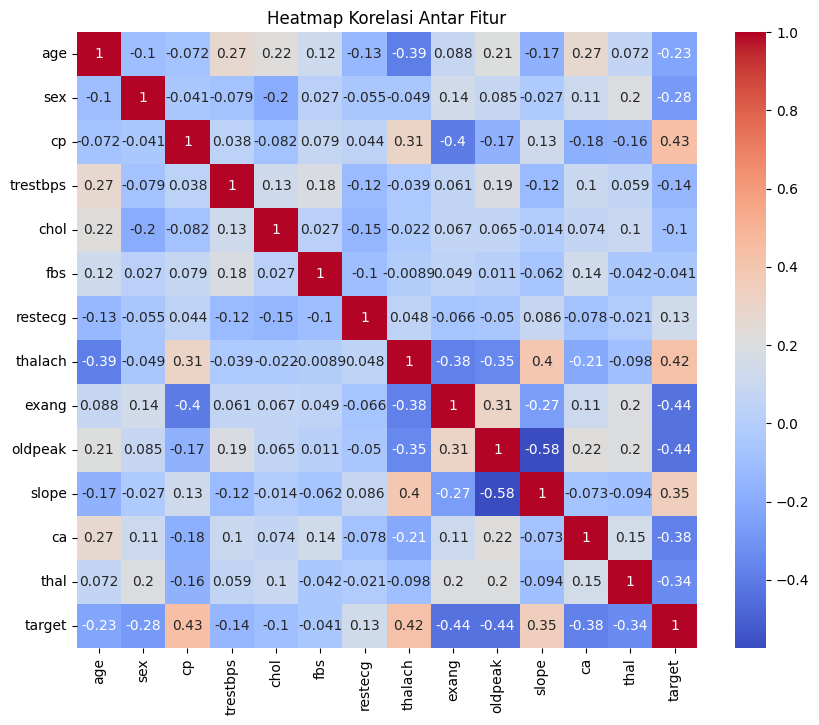

In [18]:
df = pd.read_csv('heart.csv')

print(df.info()) 
print(df['target'].value_counts()) 

# Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

korelasi nya kecil, decision tree

In [19]:
print("\nStatistical summary:\n", df.describe())


Statistical summary:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     

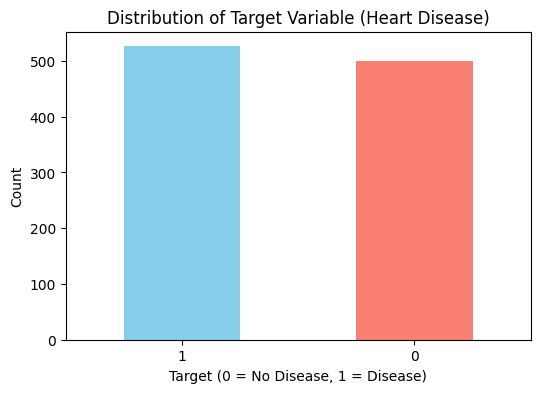

In [20]:
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)

In [24]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [26]:
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_rep = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)


Model Evaluation:
Accuracy: 81.46%
ROC-AUC Score: 92.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



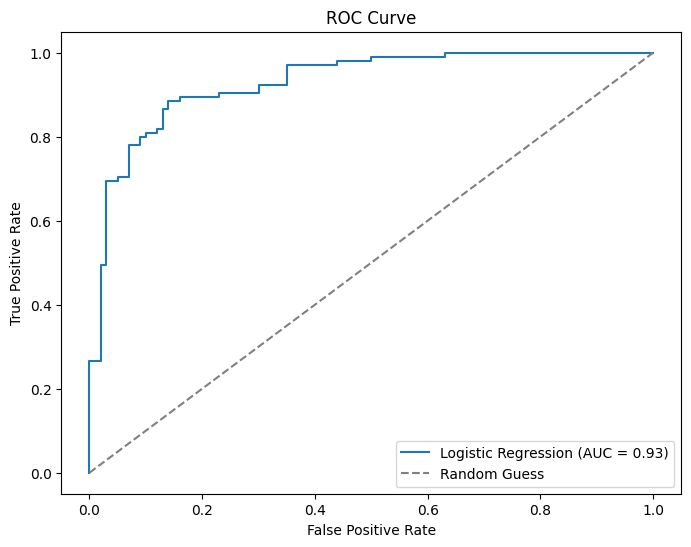

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


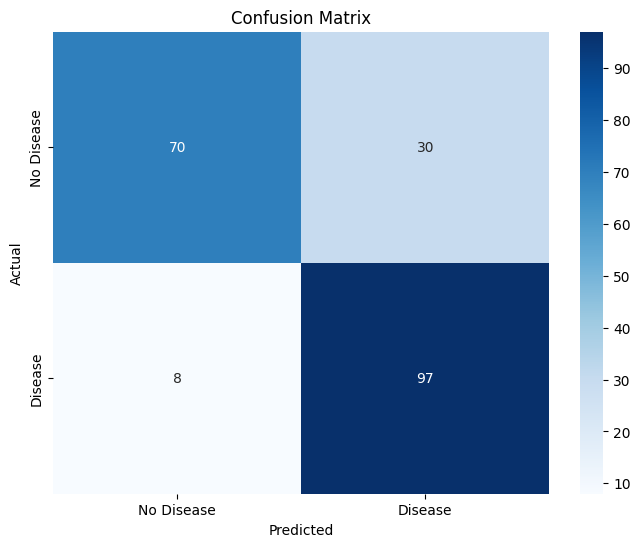

In [28]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
import pickle

In [30]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)

## Kesimpulan

Model Logistic Regression bekerja dengan baik untuk memprediksi risiko penyakit jantung dengan akurasi 81% dan AUC 93%, yang menunjukkan bahwa model ini cukup efektif dalam membedakan antara pasien yang memiliki penyakit jantung dan yang tidak.

### Detail Evaluasi Model:
- **Accuracy**: 81.46%
- **ROC-AUC Score**: 92.99%
- **Classification Report**:
    - Precision, Recall, dan F1-Score untuk masing-masing kelas (0 = No Disease, 1 = Disease) menunjukkan performa yang baik, terutama pada kelas 1 (Disease) dengan recall yang tinggi (92%).

### Confusion Matrix:
- **True Positives (TP)**: 97
- **True Negatives (TN)**: 70
- **False Positives (FP)**: 30
- **False Negatives (FN)**: 8

### ROC Curve:
- ROC Curve menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif dengan area di bawah kurva (AUC) sebesar 92.99%.

### Kesimpulan Umum:
Model Logistic Regression yang dibangun dapat digunakan sebagai alat prediktif yang efektif untuk membantu tenaga medis atau pihak rumah sakit dalam memprediksi risiko penyakit jantung pada pasien berdasarkan data kesehatan mereka. Dengan akurasi dan AUC yang tinggi, model ini dapat diandalkan untuk pengambilan keputusan klinis yang lebih baik dan lebih cepat.